<a href="https://colab.research.google.com/github/Kirill-Murashev/AI_for_valuers_book/blob/main/Parts-Chapters/Mann-Whitney-Wilcoxon/ROC-AUC_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Receiver Operating Characteristic "ROC" illustrates the performance of the binary classifier by plotting the false alarm probability ($P_{FA}$) on the horizontal axis and the detection probability ($P_D$) on the vertical axis. The area under the ROC-curve (AUC) is used to provide a single-figure quantification of the performance of the binary classifier based on the ROC. This article provides an interpretation of the AUC and connects the AUC to the Wilcoxon–Mann–Whitney statistic, which is a nonparametic test to compare two populations. This derivation is pretty hard to find but the connection between the AUC and the Wilcoxon–Mann–Whitney test is important insofar as it provides some perspective on the seemingly arbitrary use of AUC to quantify the performance of the binary classifier.

Let's proceed with some definitions and some notation. A binary classifier can make two kinds of mistakes, usually and unhelpfully called Type I and Type II errors.  The *detection probability* is 

$$P_D= \mathbb{P}(1|x \in C_1)$$

which says that given a member of the $C_1$ class, this is the probability of the binary classifier correctly classifying $x$ as of that class. The *false alarm probability* is

$$P_{FA}= \mathbb{P}(1|x \in C_0)$$

Which is the probability that an element of the $C_0$ class will Incorrectly be classified as an element of the $C_1$ class. Binary classifiers usually work by comparing the measurement $x$ to a fixed threshold, $c$, to assess class membership. We can rewrite the above two definitions using $c$ as follows:

$$P_D= \mathbb{P}(x > c|x \in C_1)$$

$$P_{FA}= \mathbb{P}( x> c|x \in C_0)$$

Thus, the ROC-curve is really a plot of the countour

$$ (P_{FA}(c),P_D(c)) $$

so that drawing of the curve actually means changing the value of the threshold, $c$. As a concrete example, we take the $f(x|C_0) = \mathcal{N}(0,1)$ and $f(x|C_1) = \mathcal{N}(2,1)$ as the two respective probability densities of $C_0$ and $C_1$. The following code constructs a ROC-curve for this situation.


In [3]:
%matplotlib inline
from IPython.html.widgets import interact
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

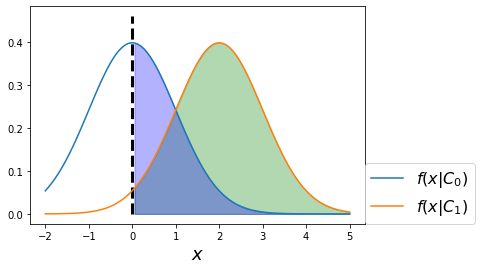

In [4]:
f0=stats.norm(0,1)
f1=stats.norm(2,1)
fig,ax = plt.subplots()
xi = np.linspace(-2,5,100)
ax.plot(xi,f0.pdf(xi),label=r'$f(x|C_0)$')
ax.plot(xi,f1.pdf(xi),label=r'$f(x|C_1)$')
ax.legend(fontsize=16,loc=(1,0))
ax.set_xlabel(r'$x$',fontsize=18)
ax.vlines(0,0,ax.axis()[-1]*1.1,linestyles='--',lw=3.)
ax.fill_between(xi,f1.pdf(xi),where=xi>0,alpha=.3,color='g')
ax.fill_between(xi,f0.pdf(xi),where=xi>0,alpha=.3,color='b')

In the above figure, the blue shaded area is the false-alarm probability and the shaded gray area is the probability of detection. These two values are what is plotted on a ROC. The dotted vertical line indicates the threshold value $c$.

In [5]:
def plot_roc_interact(c=0):
    xi = np.linspace(-3,5,100)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches((10,3))
    ax = axs[0]
    ax.plot(xi,f0.pdf(xi),label=r'$f(x|C_0)$')
    ax.plot(xi,f1.pdf(xi),label=r'$f(x|C_1)$')
    ax.set_xlabel(r'$x$',fontsize=18)
    ax.vlines(c,0,ax.axis()[-1]*1.1,linestyles='--',lw=3.)
    ax.fill_between(xi,f1.pdf(xi),where=xi>c,alpha=.3,color='g')
    ax.fill_between(xi,f0.pdf(xi),where=xi>c,alpha=.3,color='b')
    ax.axis(xmin=-3,xmax=5)
    crange = np.linspace(-3,5,50)
    ax=axs[1]
    ax.plot(1-f0.cdf(crange),1-f1.cdf(crange))
    ax.plot(1-f0.cdf(c),1-f1.cdf(c),'o',ms=15.)
    ax.set_xlabel('False-alarm probability')
    ax.set_ylabel('Detection probability')

In [6]:
interact(plot_roc_interact,c=(-3,5,.05))

interactive(children=(FloatSlider(value=0.0, description='c', max=5.0, min=-3.0, step=0.05), Output()), _dom_c…

<function __main__.plot_roc_interact>

If you drag the slider in the interactive figure above, you will see how the colored areas shown on the left frame correspond to movement along the ROC on the right. Better binary classifiers have ROC curves that reach up to the upper left corner because these are the points that correspond to very high detection probabilities at a very low false alarm probability. A test that is no better than guessing just be a diagonal line on the ROC chart. This would correspond to a 100% overlap between the two density functions.  You can try this for yourself by changing the values of the respective meanings of the two density functions to see what happens when they overlap more (or less).

The AUC is independent of the particular threshold value because the ROC-curve is drawn by sweeping over this value.  This means that the AUC is indirectly *integrated* over the threshold values.  However, the computation of the AUC is based *explicitly*  on the $P_{FA}$ as in the following,

$$ AUC = \int P_D(P_{FA})dP_{FA} $$

which doesn't give us a lot of room for interpretation.
We can start to break this up by expanding

$$ P_D(c) = 1-F_1(c)  $$

where $F_1$ is the cumulative density function for $C_1$, and analogously, for $C_0$, we have the following

$$ P_{FA}(c) = 1-F_0(c)  $$

Let's start by fixing a particular $c^*$. This corresponds to a particular $P_{FA}(c^*)$. In words, this corresponds to the probability of member of the $C_0$ class such that $x_0>c^*$, or, equivalently $\mathbb{P}(x_0>c^*|C_0)$. Note that I have introduced subscript here to emphasize that $x_0\in C_0$. By the same reasoning, we have $P_D(c^*) =\mathbb{P}(x_1>c^*|C_1) $.

Now, in terms of the AUC integral, we have to reference $P_D$ through the $P_{FA}$. The trick is choose $c^*$ distributed as $F_0$ as in $c^*\sim F_0$.


$$P_D ( c^*) =  \mathbb{P}(x_1 >c^*|C_1) $$

Weirdly enough, this makes $P_D$ a random variable in its own right, with corresponding expectation as 

$$ \mathbb{E}(P_D) =\int P_D dP_{FA} = AUC $$

Now, we finally have an interpretation. The AUC is the expected probability that an element  $ x_1 \in C_1 $ would be more probable to be assigned to class $C_1$ than an element drawn from $C_0$ to be  assigned to $ C_1 $. This is another way of saying that $1-F_1(t) > 1-F_0(t)$ for all $ t $ (i.e. *stochastically larger*).

##Wilcoxon–Mann–Whitney test

The Wilcoxon–Mann–Whitney test (AKA Mann–Whitney U-test) is a nonparametric method to test whether or not samples derive from two separate distributions. The basic idea is that if there is no difference between the two categories, then combining them into one big set and then computing the statistic (or any statistic, really) as a permutation of the larger set should be no different. In other words, if there is no difference, then combining the data and pretending that the actual observed data is just one permutation of the mixture should be indistinguishable statistically.

Supposed we need to compare to populations using the median, mean, or some other location estimator. In terms of the cumulative distribution functions for the two populations, for $ H_0 $ we have the following:

$$ H_0: F_X(t) = F_Y(t) $$

Namely, the data are drawn from the same underlying distribution. The alternative hypothesis is that $ F_X(t) \lt F_Y(t) $  for all $ t $. For example, this could happen if one of the distributions is shifted with respect to the other. We have two labeled independent samples $ \lbrace X_i \rbrace_{i=1}^n$ and $ \lbrace Y_i \rbrace_{i=1}^m$. Note that the samples sizes can be different (i.e. $ m\neq n $).

The test works by collecting all the samples into one big set and then ranking the samples within the big set. The test statistic $ U $ is the sum of the ranks (taken within the big set) of the $X$-ranks. The idea is that when $U$ is small, the $X$-variables have lower ranks (i.e. are generally smaller than the $Y$-variables). This is evidence that the $ X $-distribution is shifted to the left of the $ Y $-distribution (i.e. $ F_X(t) < F_Y(t) $, stochastically).

The following code shows an example of this for the two distributions considered above.

In [ ]:
print 'p-value ',stats.wilcoxon(f1.rvs(30),f0.rvs(30))[1]

p-value  1.79884806918e-05


Because the computed p-value is so small, we can reject the null hypothesis that the distributions $F_X(t)$ and $ F_Y(t) $ are stochastically equal. This is good because we constructed them as such!

##Connection to AUC


Writing the U-statistic this way,

$$ \hat{\theta}_{XY} = \frac{1}{m n} \sum_{i=1}^m \sum_{j=1}^n \mathbb{I}(Y_j>X_i) $$

where $ \mathbb{I} $ is the indicator function, shows that the statistic (for the discrete case) is estimating the probability that $Y$ is stochastically larger than $ X $. Thus, This correspondence means that the value of this (in the large sample limit) is equal to AUC.

##Summary

In this article, we developed the area under the receiver operating characteristic curve (ROC) and connected it to the Wilcoxon–Mann–Whitney U-statistic. This area (i.e. AUC) is used To quantify the performance of a binary classifier using a single number. The problem is that it does not distinguish between regions of performance along the ROC. Thus, two different classifiers could have the same AUC-value and provide different relative performance for certain regions of ROC graph. This difference may be important to binary classifiers that typically operate in a small region of the ROC-curve.

##References


* Boos, Dennis D., and L. A. Stefanski. Essential Statistical Inference. Springer, 2013.

* Cortes, Corinna, and Mehryar Mohri. "AUC optimization vs. error rate minimization." Advances in neural information processing systems 16.16 (2004): 313-320.

* Mann, Henry B., and Donald R. Whitney. "On a test of whether one of two random variables is stochastically larger than the other." The annals of mathematical statistics (1947): 50-60.

* Mozer, Michael C. "Optimizing classifier performance via an approximation to the Wilcoxon-Mann-Whitney statistic." (2003).